# Probability distributions

At the heart of the previously covered probabilistic methods and, in particular, Bayesian classification, are the prior probabilities $P(A)$ and the conditional probabilities $P(x|A)$ (or for probability density $p(x|A)$). It is important to understand the main tools and therefore we will study Gaussian distribution with all flavors.


## Selecting distribution

We will focus on Gaussian for the sake of time, but similar treatment should be given to all of them:

 * https://en.wikipedia.org/wiki/List_of_probability_distributions
 
 In addition to the Gaussian the following might be familiar to you:
 
  * Bernoulli distribution - modeling the coin toss
  * Poisson distribution - modeling arrival of photons to mobile camera sensor or phone calls to call center

## Gaussian distribution for one observation variable

The most common distribution used in course book experiments is the Gaussian distribution which is also known as the *normal distribution*  $\mathcal{N}$.

\begin{equation}
  \mathcal{N}(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} \enspace ,
  \label{eq:gaussian}
\end{equation}


Let's study the meaning of the two parameters $\mu$ and $\sigma^2$.

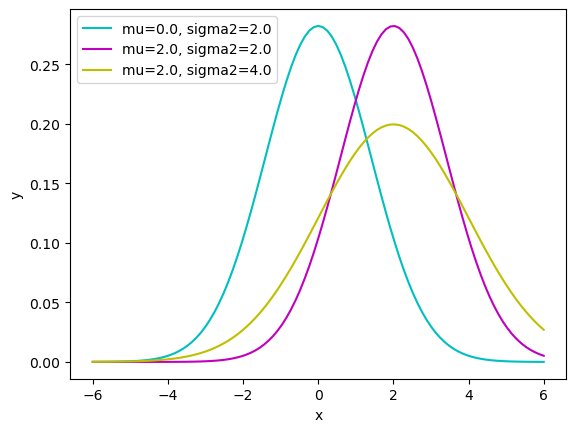

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Let's plot a few different gaussians
np.random.seed(666) # to always get the same points

x = np.linspace(-6.0,6.0,101)
mu_1 = 0.0
sigma2_1 = 2
gauss_1 = 1/np.sqrt(2*np.pi*sigma2_1)*np.exp(-1/(2*sigma2_1)*(x-mu_1)**2)
mu_2 = 2.0
sigma2_2 = 2
gauss_2 = 1/np.sqrt(2*np.pi*sigma2_2)*np.exp(-1/(2*sigma2_2)*(x-mu_2)**2)
mu_3 = 2.0
sigma2_3 = 4
gauss_3 = 1/np.sqrt(2*np.pi*sigma2_3)*np.exp(-1/(2*sigma2_3)*(x-mu_3)**2)


#
# Plot 1
plt.plot(x, gauss_1,'c-',label='mu=0.0, sigma2=2.0')
plt.plot(x, gauss_2,'m-',label='mu=2.0, sigma2=2.0')
plt.plot(x, gauss_3,'y-',label='mu=2.0, sigma2=4.0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let's now study estimation of the two parameters $\mu$ and $\sigma^2$.

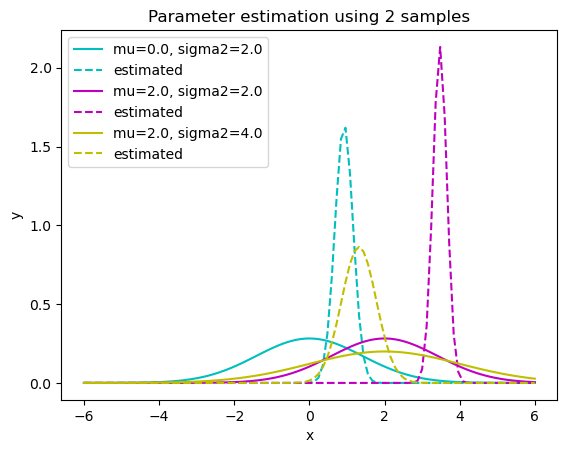

In [2]:
# Let's generate N samples using the previously defined paraters (test N=2,10,100)
N_est = 2
x_gauss_1 = np.random.normal(mu_1,np.sqrt(sigma2_1),N_est)
x_gauss_2 = np.random.normal(mu_2,np.sqrt(sigma2_2),N_est)
x_gauss_3 = np.random.normal(mu_2,np.sqrt(sigma2_3),N_est)
mu_gauss_1 = np.mean(x_gauss_1)
mu_gauss_2 = np.mean(x_gauss_2)
mu_gauss_3 = np.mean(x_gauss_3)
var_gauss_1 = np.std(x_gauss_1)**2
var_gauss_2 = np.std(x_gauss_2)**2
var_gauss_3 = np.std(x_gauss_3)**2

est_gauss_1 = 1/np.sqrt(2*np.pi*var_gauss_1)*np.exp(-1/(2*var_gauss_1)*(x-mu_gauss_1)**2)
est_gauss_2 = 1/np.sqrt(2*np.pi*var_gauss_2)*np.exp(-1/(2*var_gauss_2)*(x-mu_gauss_2)**2)
est_gauss_3 = 1/np.sqrt(2*np.pi*var_gauss_3)*np.exp(-1/(2*var_gauss_3)*(x-mu_gauss_3)**2)

#
# Plot 2 (w/ estimated parameters)
plt.plot(x, gauss_1,'c-',label='mu=0.0, sigma2=2.0')
plt.plot(x, est_gauss_1,'c--',label='estimated')
plt.plot(x, gauss_2,'m-',label='mu=2.0, sigma2=2.0')
plt.plot(x, est_gauss_2,'m--',label='estimated')
plt.plot(x, gauss_3,'y-',label='mu=2.0, sigma2=4.0')
plt.plot(x, est_gauss_3,'y--',label='estimated')
plt.title(f'Parameter estimation using {N_est} samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Two observation variables - 2D Gaussian

Let's assume we have two dimensional measurements $\vec{x} = (x_1,x_2)^T$, for example $x_1$ is height and $x_2$ is weight. Let's plot these measurements.

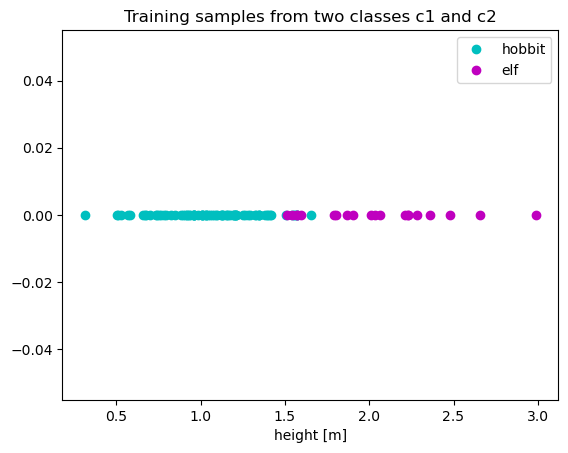

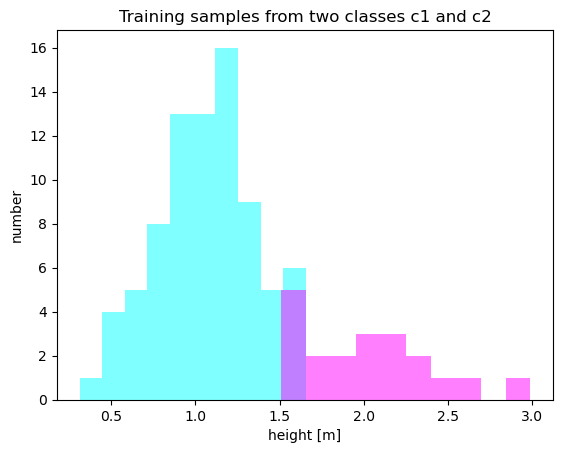

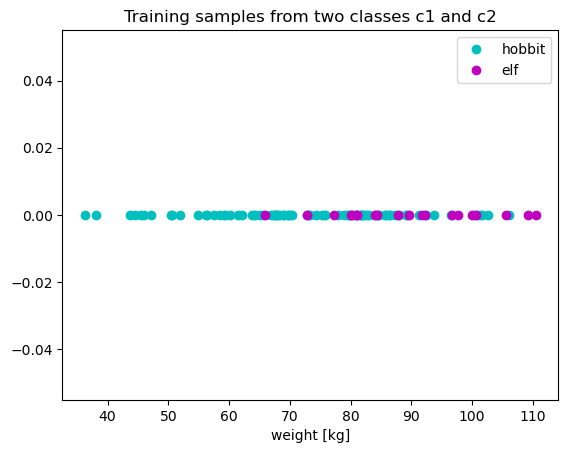

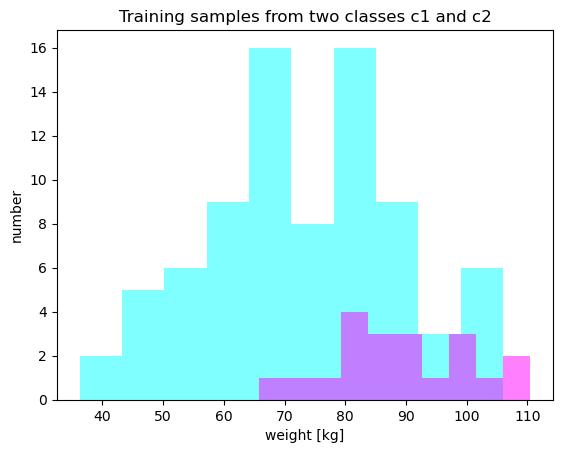

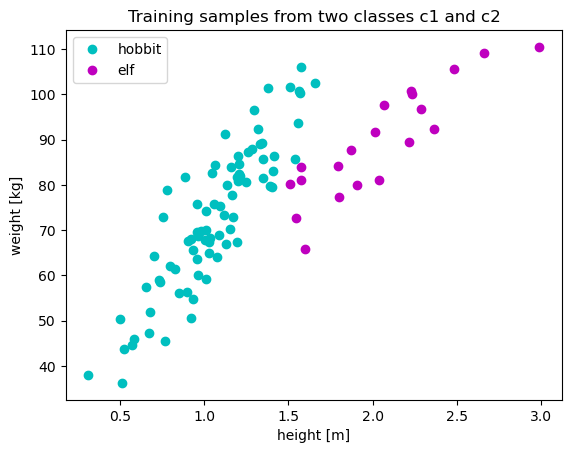

In [3]:
#
# Let's make 2D correlated data of hobbits and elfs

# Hobits
np.random.seed(42) # to always get the same points
N_h = 80 
x1_h = np.random.normal(1.1,0.3,N_h)
a_h = 50.0
b_h = 20.0
x2_h_noise =  np.random.normal(0,8,N_h)
x2_h = a_h*x1_h+b_h+x2_h_noise

# Elves
N_e = 20 
x1_e = np.random.normal(1.9,0.4,N_e)
a_e = 30.0
b_e = 30.0
x2_e_noise =  np.random.normal(0,8,N_e)
x2_e = a_e*x1_e+b_e+x2_e_noise

#
# PLOT 1 both classes in 1D
plt.plot(x1_h,np.zeros([N_h,1]),'co', label="hobbit")
plt.plot(x1_e,np.zeros([N_e,1]),'mo', label="elf")
plt.title('Training samples from two classes c1 and c2')
plt.legend()
plt.xlabel('height [m]')
plt.show()

plt.hist(x1_h, bins = 10, alpha=0.5, color='cyan')
plt.hist(x1_e, bins = 10, alpha=0.5, color='magenta')
plt.title('Training samples from two classes c1 and c2')
plt.xlabel('height [m]')
plt.ylabel('number')
plt.show()


#
# PLOT 2 both classes in 1D
plt.plot(x2_h,np.zeros([N_h,1]),'co', label="hobbit")
plt.plot(x2_e,np.zeros([N_e,1]),'mo', label="elf")
plt.title('Training samples from two classes c1 and c2')
plt.legend()
plt.xlabel('weight [kg]')
plt.show()

plt.hist(x2_h, bins = 10, alpha=0.5, color='cyan')
plt.hist(x2_e, bins = 10, alpha=0.5, color='magenta')
plt.title('Training samples from two classes c1 and c2')
plt.xlabel('weight [kg]')
plt.ylabel('number')
plt.show()

#
# PLOT 2 both classes in 2D
plt.plot(x1_h,x2_h,'co', label="hobbit")
plt.plot(x1_e,x2_e,'mo', label="elf")
plt.title('Training samples from two classes c1 and c2')
plt.legend()
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')
#plt.axis([0.5,2.5,-1.1,+1.1])
plt.show()

Let's draw a number of test samples from the same 2D distributions and classify them (assuming they are separable).

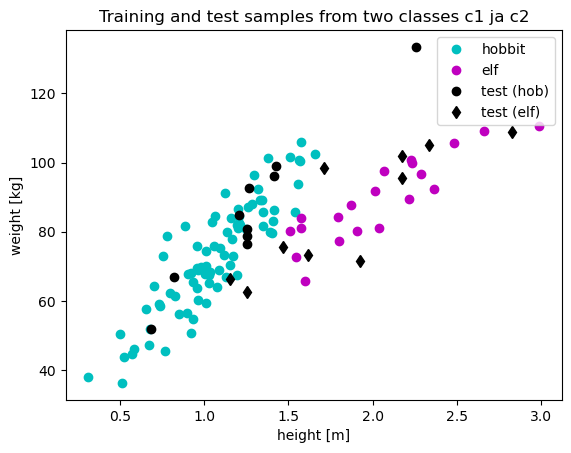

Success rate using height: 0.75
Success rate using weight: 0.60
Success rate using both (assuming they're separable): 0.75


In [4]:
#
# Let's make test data and test
N_h_test = 10
x1_h_test = np.random.normal(1.1,0.3,N_h_test)
x2_h_test_noise =  np.random.normal(0,8,N_h_test)
x2_h_test = a_h*x1_h_test+b_h+x2_h_test_noise
c_h_test = np.zeros(N_h_test)
c_h_test[:] = 1

N_e_test = 10
x1_e_test = np.random.normal(1.9,0.4,N_e_test)
x2_e_test_noise =  np.random.normal(0,8,N_e_test)
x2_e_test = a_e*x1_e_test+b_e+x2_e_test_noise
c_e_test = np.zeros(N_e_test)
c_e_test[:] = 2

plt.plot(x1_h,x2_h,'co', label="hobbit")
plt.plot(x1_e,x2_e,'mo', label="elf")
plt.plot(x1_h_test,x2_h_test,'ko', label="test (hob)")
plt.plot(x1_e_test,x2_e_test,'kd', label="test (elf)")
plt.title('Training and test samples from two classes c1 ja c2')
plt.legend()
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')
#plt.axis([0.5,2.5,-1.1,+1.1])
plt.show()

x1_test = np.concatenate((x1_h_test,x1_e_test))
x2_test = np.concatenate((x2_h_test,x2_e_test))
c_test = np.concatenate((c_h_test,c_e_test))
c_test_hat = np.zeros(c_test.shape)

priori_h = N_h/(N_h+N_e)
mu1_h = np.mean(x1_h)
mu2_h = np.mean(x2_h)
sigma2_1_h = np.var(x1_h)
sigma2_2_h = np.var(x2_h)
p_h_1 = 1/np.sqrt(2*np.pi*sigma2_1_h)*np.exp(-1/(2*sigma2_1_h)*(x1_test-mu1_h)**2)
P_h_1 = priori_h*p_h_1
p_h_2 = 1/np.sqrt(2*np.pi*sigma2_2_h)*np.exp(-1/(2*sigma2_2_h)*(x2_test-mu2_h)**2)
P_h_2 = priori_h*p_h_2
P_h = priori_h*p_h_1*p_h_2 # Naive rule for hobbits


priori_e = N_e/(N_h+N_e)
mu1_e = np.mean(x1_e)
mu2_e = np.mean(x2_e)
sigma2_1_e = np.var(x1_e)
sigma2_2_e = np.var(x2_e)
p_e_1 = 1/np.sqrt(2*np.pi*sigma2_1_e)*np.exp(-1/(2*sigma2_1_e)*(x1_test-mu1_e)**2)
P_e_1 = priori_e*p_e_1
p_e_2 = 1/np.sqrt(2*np.pi*sigma2_2_e)*np.exp(-1/(2*sigma2_2_e)*(x2_test-mu2_e)**2)
P_e_2 = priori_e*p_e_2
P_e = priori_e*p_e_1*p_e_2 # Naive rule for elves

c_test_hat[np.argwhere(np.greater(P_h_1,P_e_1) == True)] = 1
c_test_hat[np.argwhere(np.greater(P_h_1,P_e_1) == False)] = 2
corr = np.count_nonzero(np.equal(c_test,c_test_hat))
success_rate = corr/(N_h_test+N_e_test)
print(f'Success rate using height: {success_rate:.2f}')

c_test_hat[np.argwhere(np.greater(P_h_2,P_e_2) == True)] = 1
c_test_hat[np.argwhere(np.greater(P_h_2,P_e_2) == False)] = 2
corr = np.count_nonzero(np.equal(c_test,c_test_hat))
success_rate = corr/(N_h_test+N_e_test)
print(f'Success rate using weight: {success_rate:.2f}')

c_test_hat[np.argwhere(np.greater(P_h,P_e) == True)] = 1
c_test_hat[np.argwhere(np.greater(P_h,P_e) == False)] = 2
corr = np.count_nonzero(np.equal(c_test,c_test_hat))
success_rate = corr/(N_h_test+N_e_test)
print(f'Success rate using both (assuming they\'re separable): {success_rate:.2f}')

How about if we use the genuine 2D Gaussian distribution
\begin{equation}
  \mathcal{N}(\vec{x}; \vec{\mu},\mathbf{\Sigma}) =
  \frac{1}{2\pi|\mathbf{\Sigma}|^{\frac{1}{2}}}e^{-\frac{1}{2}(\vec{x}-\vec{\mu})^T\mathbf{\Sigma}^{-1}(\vec{x}-\vec{\mu})} \enspace .
  \label{eq:2dgaussian}
\end{equation}

In [ ]:
from numpy.linalg import inv

print('Mean and covariance for hobbits')
X_h = np.concatenate(([x1_h],[x2_h]),axis=0)
mu_h = np.mean(X_h,axis=1)
print(mu_h)
Sigma_h = np.cov(X_h)
print(Sigma_h)
priori_h = N_h/(N_h+N_e)


print('Mean and covariance for elves')
X_e = np.concatenate(([x1_e],[x2_e]),axis=0)
mu_e = np.mean(X_e,axis=1)
print(mu_e)
Sigma_e = np.cov(X_e)
print(Sigma_e)
priori_e = N_e/(N_h+N_e)

def gaussian2d(X,Y, mu, Sigma, priori):
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = priori*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma))*np.exp(-1/2*np.transpose([X[i,j]-mu[0], Y[i,j]-mu[1]]) @ inv(Sigma) @ [X[i,j]-mu[0], Y[i,j]-mu[1]])
    return Z

x_1 = np.linspace(0,3.0,50)
x_2 = np.linspace(0,150.0,50)

X, Y = np.meshgrid(x_1,x_2)
Z_h = gaussian2d(X,Y, mu_h, Sigma_h, priori_h)
Z_e = gaussian2d(X,Y, mu_e, Sigma_e, priori_e)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_h, 50, cmap='Greens')
ax.contour3D(X, Y, Z_e, 50, cmap='Reds')
ax.set_xlabel('height [m]')
ax.set_ylabel('weight [kg]')
ax.set_zlabel('Probability density');
#ax.legend()
plt.show()

P_h = np.zeros(x1_test.shape)
P_e = np.zeros(x1_test.shape)
for i in range(x1_test.shape[0]):
    P_h[i] = priori_h*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma_h))*np.exp(-1/2*np.transpose([x1_test[i]-mu_h[0], x2_test[i]-mu_h[1]]) @ inv(Sigma_h) @ [x1_test[i]-mu_h[0], x2_test[i]-mu_h[1]])
    P_e[i] = priori_e*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma_e))*np.exp(-1/2*np.transpose([x1_test[i]-mu_e[0], x2_test[i]-mu_e[1]]) @ inv(Sigma_e) @ [x1_test[i]-mu_e[0], x2_test[i]-mu_e[1]])

#print(P_h)
c_test_hat[np.argwhere(np.greater(P_h,P_e) == True)] = 1
c_test_hat[np.argwhere(np.greater(P_h,P_e) == False)] = 2
corr = np.count_nonzero(np.equal(c_test,c_test_hat))
success_rate = corr/(N_h_test+N_e_test)
print(f'Success rate with 2D Gaussian (non-separable): {success_rate:.2f}')

## D-dimensional Gaussian

\begin{equation}
  \mathcal{N}(\vec{x}; \vec{\mu},\mathbf{\Sigma}) =
  \frac{1}{(2\pi)^{\frac{D}{2}}|\mathbf{\Sigma}|^{\frac{1}{2}}}e^{-\frac{1}{2}(\vec{x}-\vec{\mu})^T\mathbf{\Sigma}^{-1}(\vec{x}-\vec{\mu})}
  \label{eq:Ddgaussian}
\end{equation}


### Make separable (Naive Bayes classifier)

We assume that all observation variables are independent from each other.

\begin{equation}
  \begin{split}
    \mathbf{\Sigma}_{3\times 3} &=
    \left[ \begin{array}{c c c } \sigma_1^2 & \sigma_1\sigma_2 & \sigma_1\sigma_3\\
        \sigma_2\sigma_1 & \sigma_2^2 & \sigma_2\sigma_2\\
        \sigma_3\sigma_1 & \sigma_3\sigma_2 & \sigma_3^2 \end{array} \right]\\         
    \mathbf{\Sigma}_{3\times 3}^{naive} &=
    \left[ \begin{array}{c c c } \sigma_1^2 & 0 & 0 \\
        0 & \sigma_2^2 & 0\\
        0 & 0 & \sigma_3^2 \end{array} \right]\\     
\end{split} \enspace .
  \label{eq:sigma_naive}
\end{equation}


## Gaussian mixture model

\begin{equation}
  P(\vec{x}; \left\{ \alpha_c, \vec{\mu}_c, \mathbf{\Sigma}_c\right\}_{c=1,\ldots,C}) = \sum_{c=1}^C \alpha_c \mathcal{N}(\vec{x}; \vec{\mu}_c,\mathbf{\Sigma}_c) \enspace .
\end{equation}
where

\begin{equation}
  \sum_{c=1}^C \alpha_c = 1 \enspace .
\end{equation}

In [ ]:
from sklearn.mixture import GaussianMixture

#
# Let's make 2D correlated data of hobbits and elfs

# Hobits
np.random.seed(42) # to always get the same points
N_h = 80 
x1_h = np.random.normal(1.1,0.3,N_h)
a_h = 50.0
b_h = 20.0
x2_h_noise =  np.random.normal(0,8,N_h)
x2_h = a_h*x1_h+b_h+x2_h_noise

# Elves
N_e = 20 
x1_e = np.random.normal(1.9,0.4,N_e)
a_e = 30.0
b_e = 30.0
x2_e_noise =  np.random.normal(0,8,N_e)
x2_e = a_e*x1_e+b_e+x2_e_noise

# Dwarfs
N_d = 60 
x1_d = np.random.normal(1.0,0.1,N_d)
a_d = 50.0
b_d = 40.0
x2_d_noise =  np.random.normal(0,6,N_d)
x2_d = a_d*x1_d+b_d+x2_d_noise

print('Mean and covariance for hobits')
X_h = np.concatenate(([x1_h],[x2_h]),axis=0)
mu_h = np.mean(X_h,axis=1)
print(mu_h)
Sigma_h = np.cov(X_h)
print(Sigma_h)
priori_h = N_h/(N_h+N_e+N_d)


print('Mean and covariance for elfs')
X_e = np.concatenate(([x1_e],[x2_e]),axis=0)
mu_e = np.mean(X_e,axis=1)
print(mu_e)
Sigma_e = np.cov(X_e)
print(Sigma_e)
priori_e = N_e/(N_h+N_e+N_d)

print('Mean and covariance for dwarfs')
X_d = np.concatenate(([x1_d],[x2_d]),axis=0)
mu_d = np.mean(X_d,axis=1)
print(mu_d)
Sigma_d = np.cov(X_d)
print(Sigma_d)
priori_d = N_d/(N_h+N_e+N_d)

print('Mean and covariance for dwarfs and elves combined')
X_ed = np.concatenate((X_d, X_e),axis=1)
mu_ed = np.mean(X_ed,axis=1)
print(mu_ed)
Sigma_ed = np.cov(X_ed)
print(Sigma_ed)
priori_ed = (N_d+N_e)/(N_h+N_e+N_d)

def gaussian2d(X,Y, mu, Sigma, priori):
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = priori*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma))*np.exp(-1/2*np.transpose([X[i,j]-mu[0], Y[i,j]-mu[1]]) @ inv(Sigma) @ [X[i,j]-mu[0], Y[i,j]-mu[1]])
    return Z

x_1 = np.linspace(0,3.0,70)
x_2 = np.linspace(0,150.0,70)

X, Y = np.meshgrid(x_1,x_2)
Z_h = gaussian2d(X,Y, mu_h, Sigma_h, priori_h)
Z_e = gaussian2d(X,Y, mu_e, Sigma_e, priori_e)
Z_d = gaussian2d(X,Y, mu_d, Sigma_d, priori_d)
Z_ed = gaussian2d(X,Y, mu_ed, Sigma_ed, priori_ed)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_h, 50, cmap='Greens')
ax.contour3D(X, Y, Z_e, 50, cmap='Reds')
ax.contour3D(X, Y, Z_d, 50, cmap='Blues')
ax.set_xlabel('height [m]')
ax.set_ylabel('weight [kg]')
ax.set_zlabel('Probability density');
plt.legend()
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_h, 50, cmap='Greens')
ax.contour3D(X, Y, Z_ed, 50, cmap='Greys')
ax.set_xlabel('height [m]')
ax.set_ylabel('weight [kg]')
ax.set_zlabel('Probability density');
plt.legend()
plt.show()

#
# Run Gaussian mixture model
gm = GaussianMixture(n_components=2, random_state=0).fit(X_ed.T)
mu_ed1 = gm.means_[0]
mu_ed2 = gm.means_[1]
Sigma_ed1 = gm.covariances_[0]
Sigma_ed2 = gm.covariances_[1]
priori_ed1 = gm.weights_[0]/(gm.weights_[0]+gm.weights_[1])*priori_ed
priori_ed2 = gm.weights_[1]/(gm.weights_[0]+gm.weights_[1])*priori_ed
Z_ed_1 = gaussian2d(X,Y, mu_ed1, Sigma_ed1, priori_ed1)
Z_ed_2 = gaussian2d(X,Y, mu_ed2, Sigma_ed2, priori_ed2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_h, 50, cmap='Greens')
ax.contour3D(X, Y, Z_ed_1, 50, cmap='Greys')
ax.contour3D(X, Y, Z_ed_2, 50, cmap='Greys')
ax.set_xlabel('height [m]')
ax.set_ylabel('weight [kg]')
ax.set_zlabel('Probability density');
plt.legend()
plt.show()

#
# Let's make test data and test

N_h_test = 10
x1_h_test = np.random.normal(1.1,0.3,N_h_test)
x2_h_test_noise =  np.random.normal(0,8,N_h_test)
x2_h_test = a_h*x1_h_test+b_h+x2_h_test_noise
c_h_test = np.zeros(N_h_test)
c_h_test[:] = 1

N_e_test = 10
x1_e_test = np.random.normal(1.9,0.4,N_e_test)
x2_e_test_noise =  np.random.normal(0,8,N_e_test)
x2_e_test = a_e*x1_e_test+b_e+x2_e_test_noise
c_e_test = np.zeros(N_e_test)
c_e_test[:] = 2

x1_test = np.concatenate((x1_h_test,x1_e_test))
x2_test = np.concatenate((x2_h_test,x2_e_test))
c_test = np.concatenate((c_h_test,c_e_test))

P_h = np.zeros(x1_test.shape)
P_e = np.zeros(x1_test.shape)
P_ed = np.zeros(x1_test.shape)
P_ed2 = np.zeros(x1_test.shape)
for i in range(x1_test.shape[0]):
    P_h[i] = priori_h*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma_h))*np.exp(-1/2*np.transpose([x1_test[i]-mu_h[0], x2_test[i]-mu_h[1]]) @ inv(Sigma_h) @ [x1_test[i]-mu_h[0], x2_test[i]-mu_h[1]])
    P_e[i] = priori_e*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma_e))*np.exp(-1/2*np.transpose([x1_test[i]-mu_e[0], x2_test[i]-mu_e[1]]) @ inv(Sigma_e) @ [x1_test[i]-mu_e[0], x2_test[i]-mu_e[1]])
    P_ed[i] = priori_ed*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma_ed))*np.exp(-1/2*np.transpose([x1_test[i]-mu_ed[0], x2_test[i]-mu_ed[1]]) @ inv(Sigma_ed) @ [x1_test[i]-mu_ed[0], x2_test[i]-mu_ed[1]])
    P_ed2[i] = priori_ed1*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma_ed1))*np.exp(-1/2*np.transpose([x1_test[i]-mu_ed1[0], x2_test[i]-mu_ed1[1]]) @ inv(Sigma_ed1) @ [x1_test[i]-mu_ed1[0], x2_test[i]-mu_ed1[1]])+priori_ed2*1/np.sqrt(2*np.pi)*1/np.sqrt(np.linalg.det(Sigma_ed2))*np.exp(-1/2*np.transpose([x1_test[i]-mu_ed2[0], x2_test[i]-mu_ed2[1]]) @ inv(Sigma_ed2) @ [x1_test[i]-mu_ed2[0], x2_test[i]-mu_ed2[1]])


#print(P_h)
#print(P_e)
#print(P_ed)
#print(np.greater(P_h,P_ed))
c_test_hat = np.zeros(c_test.shape)
c_test_hat[np.argwhere(np.greater(P_h,P_e) == True)] = 1
c_test_hat[np.argwhere(np.greater(P_h,P_e) == False)] = 2
corr = np.count_nonzero(np.equal(c_test,c_test_hat))
success_rate = corr/(N_h_test+N_e_test)
print(f'Success rate using hobbits and elves: {success_rate:.2f}')

c_test_hat = np.zeros(c_test.shape)
c_test_hat[np.argwhere(np.greater(P_h,P_ed) == True)] = 1
c_test_hat[np.argwhere(np.greater(P_h,P_ed) == False)] = 2
corr = np.count_nonzero(np.equal(c_test,c_test_hat))
success_rate = corr/(N_h_test+N_e_test)
print(f'Success rate using hobbits and mixture of dwarfs and elves: {success_rate:.2f}')

c_test_hat = np.zeros(c_test.shape)
c_test_hat[np.argwhere(np.greater(P_h,P_ed2) == True)] = 1
c_test_hat[np.argwhere(np.greater(P_h,P_ed2) == False)] = 2
corr = np.count_nonzero(np.equal(c_test,c_test_hat))
success_rate = corr/(N_h_test+N_e_test)
print(f'Success rate using hobbits and mixture but with GMM: {success_rate:.2f}')

## Non-parametric probability density models

For $N$ samples $x_n$ we define the probability at point $x$ as a Gaussian centered at $x$ ($\mu = x$) - this produces the probability value at location $x$ which is made by weighing each training sample according to a Gaussian window:

\begin{equation}
P(x) = \frac{1}{N} \sum_{n=1}^N \frac{1}{h} k\left(\frac{x-x_n}{h}\right) = \sum_{n=1}^N \mathcal{N}\left(x_n; x,h\right) \enspace
\end{equation}


Let's play the only parameter of this model that is the window width $h$ that corresponds to the Gaussian variance $\sigma^2$.

In [ ]:
#
# 1. Generate and plot random points for training
np.random.seed(66) # to always get the same points
N_h = 1000
N_e = 200
mu_h_gt = 1.1
mu_e_gt = 1.9
sigma_h_gt = 0.3
sigma_e_gt = 0.4
x_h = np.random.normal(mu_h_gt,sigma_h_gt,N_h)
x_e = np.random.normal(mu_e_gt,sigma_e_gt,N_e)
plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
plt.title(f'{N_h} hobit height')
plt.legend()
plt.xlabel('height [m]')
plt.axis([0.0,3.0,-1.1,+1.1])
plt.show()

#
#
mu_h_est = np.mean(x_h)
mu_e_est = np.mean(x_e)
sigma_h_est = np.std(x_h)
sigma_e_est = np.std(x_e)
print(f'Avg height hobits {mu_h_est:0.2f} (GT: {mu_h_gt:0.2f})')
print(f'Avg height elves {mu_e_est:0.2f} (GT: {mu_e_gt:0.2f})')
print(f'Height st. deviation hobits {sigma_h_est:0.3f} (GT: {sigma_h_gt:0.3f})')
print(f'Height st. deviation elves {sigma_e_est:0.3f} (GT: {sigma_e_gt:0.3f})')

def gaussian(x, mu, sigma, priori):
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        z[i] = priori*1/np.sqrt(2*np.pi)*1/sigma*np.exp((-1/2*(x[i]-mu)**2)/(2*sigma**2))
    return z


#
#
[x, step_size] = np.linspace(0,3.0,70,retstep=True)
lhood_h_est = gaussian(x, mu_h_est, sigma_h_est, 1)
lhood_e_est = gaussian(x, mu_e_est, sigma_e_est, 1)
lhood_h_gt = gaussian(x, mu_h_gt, sigma_h_gt, 1)
lhood_e_gt = gaussian(x, mu_e_gt, sigma_e_gt, 1)
plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
plt.plot(x,lhood_h_gt,'c-', label="hobit (GT)")
plt.plot(x,lhood_e_gt,'m-', label="elf (GT)")
plt.plot(x,lhood_h_est,'c--', label="hobit (est)")
plt.plot(x,lhood_e_est,'m--', label="elf (est)")
plt.legend()
plt.xlabel('pituus [m]')
#plt.axis([0.0,3.0,-1.1,+5])
plt.show()

#
#
kern_width = 0.2
[x, step_size] = np.linspace(0,3.0,70,retstep=True)
plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
[x_kern, step_size_kern] = np.linspace(0,3.0,11,retstep=True)
x_kern_plot = np.linspace(-1.0,+4.0,201)
for foo_ind, foo_val in enumerate(x_kern):
    foo_kern = gaussian(x_kern_plot, foo_val, kern_width, 1)
    plt.plot(x_kern_plot, foo_kern,'y--',label='kernel')
    break
plt.legend()
plt.xlabel('height [m]')
#plt.axis([0.0,3.0,-1.1,+5])
plt.show()

# Output value is Gaussian kernel multiplied by all positive samples
lhood_h_est_kern = np.zeros(len(x))
for xind, xval in enumerate(x):
    lhood_h_est_kern[xind] = sum(gaussian(x_h,xval,kern_width,1))/len(x_h)
    #lhood_h_est_kern[xind] = sum(stats.norm.pdf(x_h, xval, kernel_width))

plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
plt.plot(x,lhood_h_gt,'c-', label="hobit (GT)")
plt.plot(x,lhood_h_est_kern,'c--', label="hobit (est)")
#plt.plot(x,lhood_e_est,'m--', label="haltija (est)")
plt.legend()
plt.xlabel('height [m]')
#plt.axis([0.0,3.0,-1.1,+5])
plt.show()

#
#
kern_width = 0.02
[x, step_size] = np.linspace(0,3.0,70,retstep=True)
plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
[x_kern, step_size_kern] = np.linspace(0,3.0,11,retstep=True)
x_kern_plot = np.linspace(-1.0,+4.0,201)
for foo_ind, foo_val in enumerate(x_kern):
    foo_kern = gaussian(x_kern_plot, foo_val, kern_width, 1)
    plt.plot(x_kern_plot, foo_kern,'y--',label='kerneli')
    break
plt.legend()
plt.xlabel('height [m]')
#plt.axis([0.0,3.0,-1.1,+5])
plt.show()

# Output value is Gaussian kernel multiplied by all positive samples
lhood_h_est_kern = np.zeros(len(x))
for xind, xval in enumerate(x):
    lhood_h_est_kern[xind] = sum(gaussian(x_h,xval,kern_width,1))/len(x_h)
    #lhood_h_est_kern[xind] = sum(stats.norm.pdf(x_h, xval, kernel_width))

plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
plt.plot(x,lhood_h_gt,'c-', label="hobit (GT)")
plt.plot(x,lhood_h_est_kern,'c--', label="hobit (est)")
#plt.plot(x,lhood_e_est,'m--', label="haltija (est)")
plt.legend()
plt.xlabel('height [m]')
#plt.axis([0.0,3.0,-1.1,+5])
plt.show()

#
#
kern_width = 0.8
[x, step_size] = np.linspace(0,3.0,70,retstep=True)
plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
[x_kern, step_size_kern] = np.linspace(0,3.0,11,retstep=True)
x_kern_plot = np.linspace(-1.0,+4.0,201)
for foo_ind, foo_val in enumerate(x_kern):
    foo_kern = gaussian(x_kern_plot, foo_val, kern_width, 1)
    plt.plot(x_kern_plot, foo_kern,'y--',label='kernel')
    break
plt.legend()
plt.xlabel('height [m]')
#plt.axis([0.0,3.0,-1.1,+5])
plt.show()

# Output value is Gaussian kernel multiplied by all positive samples
lhood_h_est_kern = np.zeros(len(x))
for xind, xval in enumerate(x):
    lhood_h_est_kern[xind] = sum(gaussian(x_h,xval,kern_width,1))/len(x_h)
    #lhood_h_est_kern[xind] = sum(stats.norm.pdf(x_h, xval, kernel_width))

plt.plot(x_h,np.zeros([N_h,1]),'co', label="hobit")
plt.plot(x_e,np.zeros([N_e,1]),'mo', label="elf")
plt.plot(x,lhood_h_gt,'c-', label="hobit (GT)")
plt.plot(x,lhood_h_est_kern,'c--', label="hobit (est)")
#plt.plot(x,lhood_e_est,'m--', label="haltija (est)")
plt.legend()
plt.xlabel('height [m]')
#plt.axis([0.0,3.0,-1.1,+5])
plt.show()


## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 1-2.